In [ ]:
"""
앞서 만든 프로젝트 코드를 간결하게 작성해 보자
"""

In [1]:
# 배경 블러 처리
# opencv 설치
! pip install opencv-python pixellib # 다시 시작이 요구될 수 있습니다.


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 39.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 41.0 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Building 'fvcore' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build i

In [2]:
# 라이브러리 설치
import cv2
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
import os
import numpy as np
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
import torch
# torch: PyTorch. 딥러닝 및 텐서 연산을 위한 라이브러리. 인공지능 모델을 만들거나 불러와 추론하는 도구
import torchvision.transforms as T
# torchvision: 이미지 변환 및 전처리를 위한 torchvision의 transform 모듈
from torchvision.models.segmentation import deeplabv3_resnet101
# deeplabv3_resnet101: 사전 학습된 DeepLabV3 모델. 이미지를 분류하도록 학습된 모델
import matplotlib.pyplot as plt
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

print('슝=3')

슝=3


이미지 크기: (3392, 2544, 3)


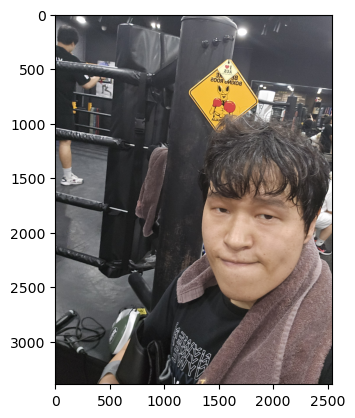

In [4]:
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/AIFFEL_quest_rs/Exploration/Ex04/kim.jpg")
img_orig = cv2.imread(img_path)

print(f"이미지 크기: {img_orig.shape}")

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# DeepLab 모델을 준비하겠습니다. 아까 준비한 Torchvision을 이용하면 편하게 사용할 수 있습니다.
# deeplabv3_resnet101
# 먼저 Torchvision에서 제공해 주는 모델을 다운로드합니다.
model = deeplabv3_resnet101(pretrained=True).eval()

In [7]:
# 이미지 처리 인공지능 모델 중 사전 학습된 모델은 모델의 전처리 방식과 입력 크기 등이 
# 사전 학습에 사용한 것과 동일하게 사용해야합니다.
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])

In [8]:
"""
전처리 코드를 이용해 우리가 사용할 이미지를 전처리해줍니다.

지금은 기억할 필요 없지만 우리가 사용할 DeepLab 모델을 비롯해 인공지능 모델 중 여러 데이터를 동시에(batch) 처리하는 것을 상정하는 경우 배치(batch) 차원을 추가해주어야합니다.
"""
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [9]:
# 이제 모델에 이미지를 입력해 볼게요.
# %%time
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

In [10]:
"""
segmentAsPascalvoc라는 함수 이름에서 세그멘테이션 모델에 대한 힌트를 얻을 수 있는데요. 
PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미입니다. 
모델마다 학습시킨 데이터에 따라 결괏값이 달라지므로 어떤 데이터를 학습시켰는지 확인하는 것은 매우 중요합니다.

PASCAL VOC
PASCAL VOC 데이터의 라벨 종류는 아래와 같습니다.
"""

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

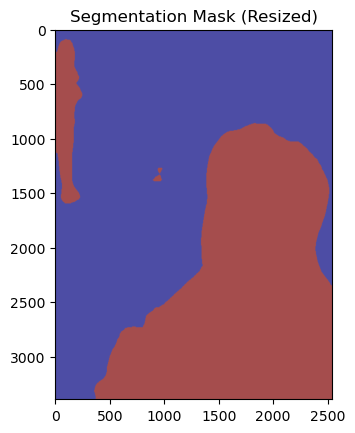

In [11]:
"""
background를 제외하면 20개의 클래스가 있습니다. 따라서 20 의 의미는 tv 가 되겠네요! 0부터 시작하니까요.

우리는 이 중 사람(person) 라벨, 즉 15를 가진 영역만 검출해 내고 싶습니다. 
이제 사람만 어떻게 추출할 수 있을지 알아봅시다.

아까 모델에서 나온 출력값을 살짝 살펴볼게요.
"""
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [12]:
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([ 0, 15], dtype=uint8)

In [13]:
for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

background
person


In [14]:
"""
output에는 세그멘테이션이 된 결과가 각각 다른 색상으로 담겨 있네요. 
segvalues에는 class_ids와 masks가 있습니다. 
class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있군요!

이제 물체마다 output에 어떤 색상으로 나타나 있는지만 알아내면 될 것 같습니다.
"""
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생성 코드 결과물이예요!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [15]:
# DeepLab에 따르면 위와 같은 색을 사용했다고 하네요. 그럼 사람을 나타내는 15번째 색상은 무엇일까요?
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

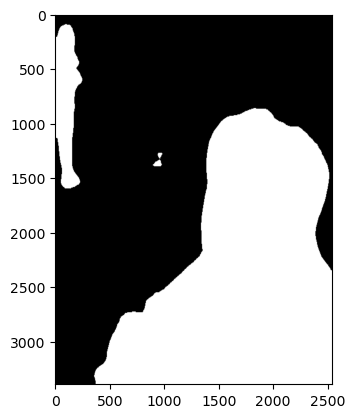

In [16]:
"""
사람 외에도 다른 물체를 찾아내고 싶다면 colormap[class_id]처럼 찾아낼 수 있겠네요!

이제 사람만 표시된 마스크를 만들어봅시다.
"""
# output의 픽셀 별로 예측된 class가 사람이라면 1(True), 다르다면 0(False)이 됩니다
# 1과 0에 각각 255를 곱하였으므로 사람으로 예측된 픽셀은 255, 그렇지 않은 픽셀은 0
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 15)  # 클래스 ID 15 (사람)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

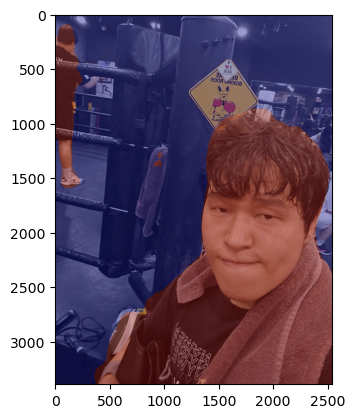

In [17]:
# 원래 이미지와 겹쳐 보면 세그멘테이션이 얼마나 잘 되었는지 알아보기 쉬울 것 같네요.
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

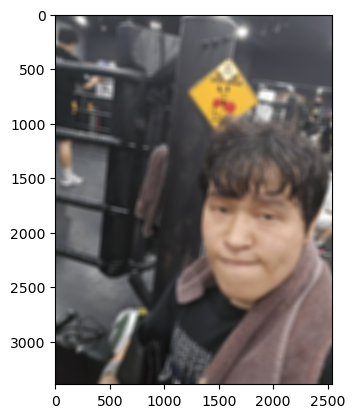

In [21]:
"""
% 5. 배경 흐리게 하기
이번에는 배경을 흐리게 만듭니다. blur() 함수를 이용합니다.
"""
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (50, 50))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

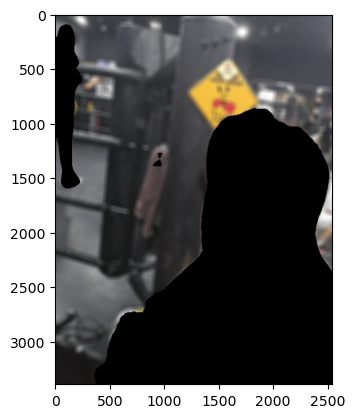

In [22]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출하겠습니다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

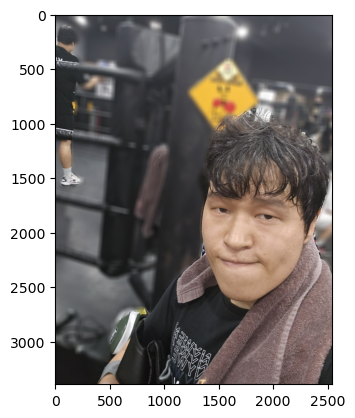

In [23]:
"""
6. 흐린 배경과 원본 영상 합성
이제 배경 영상과 사람 영상을 합치기만 하면 되겠죠?
"""
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

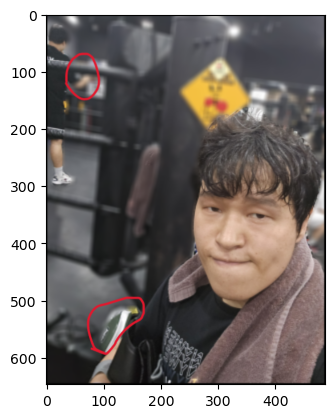

In [24]:
# 문제에 대한 분석을 해보자
# 문제를 표시한 이미지를 보여 주자
img_problem = os.path.join(home_dir, "work/AIFFEL_quest_rs/Exploration/Ex04/problem.png")
img_orig_problem = cv2.imread(img_problem)
plt.imshow(cv2.cvtColor(img_orig_problem, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
"""
이미지를 보면 알겠지만 사람의 팔이 아닌 부분을 사람으로 인식했다.
그리고 뒤에 사람을 인식하고 따로 빼는 것은 매우 놀라운 것이었지만
뒤에 사람의 팔을 인식하지 못했다.
이정도만 해도 꽤 쓸만 할 것 같다는 생각이다.
"""

SyntaxError: incomplete input (1088652548.py, line 1)

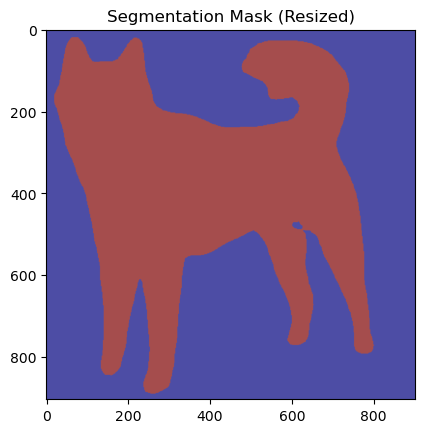

background
dog


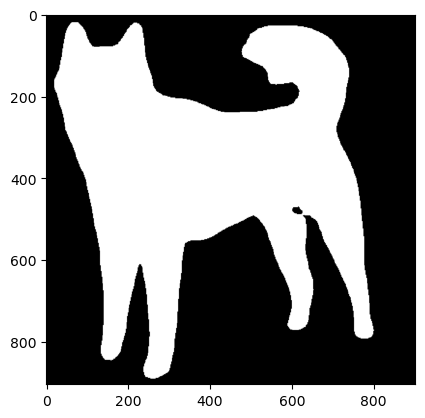

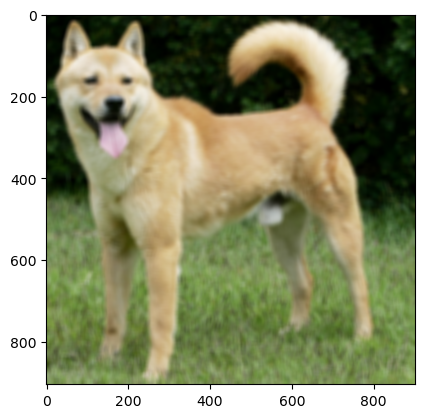

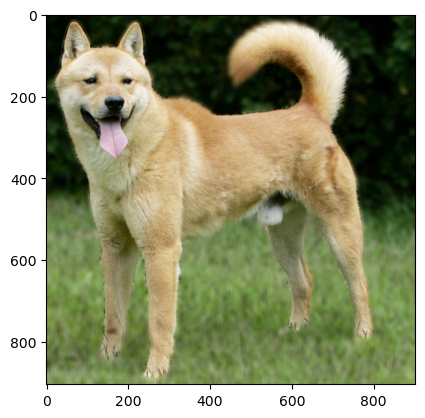

In [37]:
# 자 그럼 이제 동물에 대해서 클래스만 남기고 배경 블러 처리를 해보자

#이번에는 진짜 코드를 간결하게 해보자

# 이미지 불러오
home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/AIFFEL_quest_rs/Exploration/Ex04/dog.jpg")
img_orig = cv2.imread(img_path)

# 먼저 Torchvision에서 제공해 주는 모델을 다운로드합니다.
model = deeplabv3_resnet101(pretrained=True).eval()
# 이미지 처리 인공지능 모델 중 사전 학습된 모델은 모델의 
#전처리 방식과 입력 크기 등이 사전 학습에 사용한 것과 동일하게 사용해야합니다.
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

# 이제 모델에 이미지를 입력
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()
# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 출력에서 나온 이미지 확인
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

unique_classes = np.unique(output_predictions_resized)
unique_classes

for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력
colormap[15]   #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 12)  # 클래스 ID 12 (개)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

# 배경 흐리게 하
img_orig_blur = cv2.blur(img_orig, (13, 13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)
# 블러 이미지 생
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 개와 배경색이 달라서 그런지 이번 개는 잘 따진 것 같은데 한가지 아쉬운점이 있다.
# 개를 딸때 꼬리가 짤렸다.
# 이정도면 구분하기는 매우 좋은 이미지 같은데 이런일이 일어나니 의아하다.

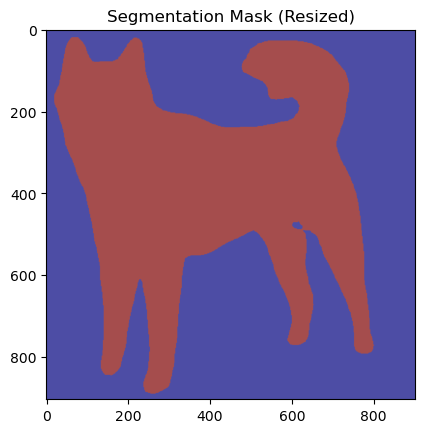

background
dog


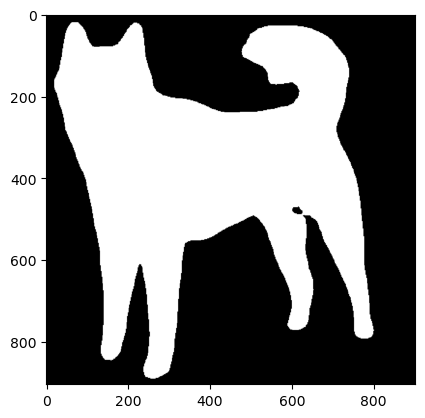

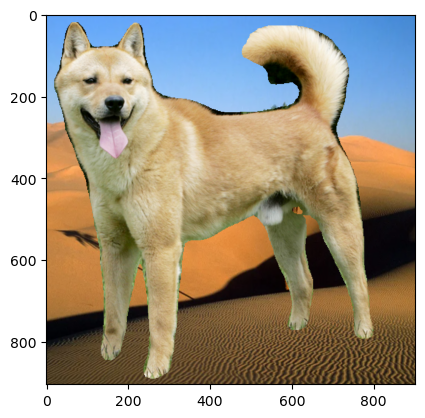

In [43]:
# 그닥 간결 한것 같지는 않다.
# 그래도 불필요한 확인을 빼고 통합했으니 만족
#이제 뒤에 배경을 없애고 다른 이미지로 대체해 보자

# 이미지 불러오기 
home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/AIFFEL_quest_rs/Exploration/Ex04/dog.jpg")
img_orig = cv2.imread(img_path)

sand_img_path = "sand.jpg"  # 사막 배경 이미지
sand_img = cv2.imread(sand_img_path)
# sand_img = cv2.cvtColor(sand_img, cv2.COLOR_BGR2RGB)

# 먼저 Torchvision에서 제공해 주는 모델을 다운로드합니다.
model = deeplabv3_resnet101(pretrained=True).eval()
# 이미지 처리 인공지능 모델 중 사전 학습된 모델은 모델의 
#전처리 방식과 입력 크기 등이 사전 학습에 사용한 것과 동일하게 사용해야합니다.
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

# 이제 모델에 이미지를 입력
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()
# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

# 출력에서 나온 이미지 확인
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

unique_classes = np.unique(output_predictions_resized)
unique_classes

for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력
colormap[15]   #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 12)  # 클래스 ID 12 (개)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

# 배경을 개 이미지 크기에 맞춤
sand_img_resized = cv2.resize(sand_img, (img_orig.shape[1], img_orig.shape[0]))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.


img_concat = np.where(img_mask_color==255, img_orig, sand_img_resized)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
# 이렇게 보니 기존 이미지에서 블러 처리 할때보다 잘 안따진 듯 하다.
# 털달린 동물을 누끼 따는게 사람도 쉽지 않듯이 이것도 마찬 가지 겠지
# 그리고 강아지의 다리 사이가 뚤린게 그전에는 티도 안났는데 이렇게 보니 이상하다.
# 그래도 이정도면 잘 따기는 했는데 조금 아쉬움이 남는다.

In [ ]:
# 그리고 전체 코드를 돌리는데 생각보다 시간이 많이 걸린다.
# 누끼따는 딥러닝 처리 과정이 오래 걸린다.

In [ ]:
"""
회고
털 같은 민감한 것에 다른 프로그램을 활용해서 어떤 다른 점이 있는지 확인해 보기 위해 
HRNet 이라는 모델을 적용해 보고자 했지만 생각보다 어려웠다.
일단 OS 환경이 안맞는다고 하고 C++ 컴파일이 필요해서 C++도 있어야 하고... 등등 해결해야하는
문제는 많은데 아직 내가 해결할 수준이 안되는 것 같다. ㅜㅠ
추후에 내 노트북에 설치하고 직접 하는 방법부터 다시 해봐야 하겠다.

그리고 지금처럼 세그멘테이션에 대해서는 관심이 많은데 이렇게 오래 걸리거나 PC의 리소스르 너무 많이
먹으면 안된다. 이걸 가볍고 원하는 것에 대해서만 간단히 할 수 있는 방법을 연구하고 싶다.
"""